In [2]:
using DifferentialEquations
using Plots
using PyCall
using LaTeXStrings
using HDF5
cp = pyimport("CoolProp.CoolProp")

PyObject <module 'CoolProp.CoolProp' from 'C:\\Users\\Allex\\.julia\\conda\\3\\lib\\site-packages\\CoolProp\\CoolProp.cp36-win_amd64.pyd'>

# Allex Delgado (2022)

## Parâmetros de entrada para a biela

In [81]:
BIELA = Dict(
    # Base menor da haste da biela
    :b => 17e-3,
    
    # Base maior da haste da biela
    :B => 37e-3,
    
    # Comprimento da haste da biela
    :l => 130e-3,
    
    # Espessura da haste da biela
    :a => 5e-3,
    
    # Espessura do mancal menor
    :h_1 => 8e-3,
    
    # Espessura do mancal maior
    :h_2 => 8e-3,
    
    # Diâmetro externo do mancal menor
    :D_1 => 28e-3,
    
    # Diâmetro externo do mancal maior
    :D_2 => 48e-3,
    
    # Diâmetro interno do mancal menor
    :d_1 => 10e-3,
    
    # Diâmetro interno do mancal maior
    :d_2 => 22e-3,
)

Dict{Symbol, Float64} with 10 entries:
  :l   => 0.13
  :b   => 0.017
  :a   => 0.005
  :D_1 => 0.028
  :D_2 => 0.048
  :d_1 => 0.01
  :h_1 => 0.008
  :h_2 => 0.008
  :B   => 0.037
  :d_2 => 0.022

In [82]:
l, b, a, D_1, D_2, d_1, h_1, h_2, B, d_2 = BIELA[:l], BIELA[:b], BIELA[:a], BIELA[:D_1], BIELA[:D_2], BIELA[:d_1], BIELA[:h_1], BIELA[:d_2], BIELA[:B], BIELA[:d_2]

(0.13, 0.017, 0.005, 0.028, 0.048, 0.01, 0.008, 0.022, 0.037, 0.022)

## Parâmetros de entrada para a manivela

In [83]:
MANIVELA = Dict(
    # Espessura da manivela
    :e_M => 0.02,
    
    # Raio do semicírculo maior que compõe a manivela
    :r_1 => 0.20,
    
    # Raio do semicírculo menor que compõe a manivela
    :r_2 => 0.15,
    
    # Base maior do trapézio que compõe a manivela
    :w_1 => 0.20,
    
    # Base menor do trapézio que compõe a manivela
    :w_2 => 0.10,
    
    # Altura do trapézio que compõe a manivela
    :h_TR => 0.20
)

Dict{Symbol, Float64} with 6 entries:
  :r_2  => 0.15
  :w_2  => 0.1
  :r_1  => 0.2
  :h_TR => 0.2
  :e_M  => 0.02
  :w_1  => 0.2

In [84]:
e_M, r_1, r_2, w_1, w_2, h_TR = MANIVELA[:e_M], MANIVELA[:r_1], MANIVELA[:r_2], MANIVELA[:w_1], MANIVELA[:w_2], MANIVELA[:h_TR]

(0.02, 0.2, 0.15, 0.2, 0.1, 0.2)

## Parâmetros de entrada para o pistão

In [85]:
PISTÃO = Dict(
    # Altura do pistão
    :H_p => 0.08,
    
    # Diâmetro externo do pistão
    :D_p => 0.08,
    
    # Diâmetro interno do pistão
    :d_p => 0.06,
    
    # Espessura da parede superior do pistão
    :e_p => 0.015,
)

Dict{Symbol, Float64} with 4 entries:
  :D_p => 0.08
  :d_p => 0.06
  :H_p => 0.08
  :e_p => 0.015

In [86]:
D_p, d_p, H_p, e_p = PISTÃO[:D_p], PISTÃO[:d_p], PISTÃO[:H_p], PISTÃO[:e_p]

(0.08, 0.06, 0.08, 0.015)

## Cálculos geométricos para a biela

In [87]:
# Densidade do material utilizado para a fabricação de todos os componentes do motor em questão
ρ = 2700.00 #kg/m^3 (Alumínio)

# Ângulo de abertura do segmento circular menor
α_SC_1 = 2*asin(b/D_1)

# Ângulo de abertura do segmento circular maior
α_SC_2 = 2*asin(B/D_2)

# Massa da haste da biela
m_haste = ρ * a * (((B + b) * l / 2) - (D_1^2/8) * (α_SC_1 - sin(α_SC_1)) - (D_2^2/8) * (α_SC_2 - sin(α_SC_2)))

# Altura do segmento cirular maior
h_SC_2 = D_2/2 - sqrt(D_2^2/4 - B^2/4)

# Altura do segmento cirular menor
h_SC_1 = D_1/2 - sqrt(D_1^2/4 - b^2/4)

# Localização do centro de massa da haste da biela
CM_haste = (((B + 2*b) * l^2)/6 - (B^3/(12 * (D_2^2/8) * (α_SC_2 - sin(α_SC_2))) - D_2/2 + h_SC_2) * (D_2^2/8) * (α_SC_2 - sin(α_SC_2)) - (l - (b^3/(12 * (D_1^2/8) * (α_SC_1 - sin(α_SC_1))) - D_1/2 + h_SC_1)) * (D_1^2/8) * (α_SC_1 - sin(α_SC_1)))/ (((B-b)*l)/2 - (D_2^2/8) * (α_SC_2 - sin(α_SC_2)) - (D_1^2/8) * (α_SC_1 - sin(α_SC_1)))

# Massa do mancal maior
m_CO_maior = ρ * π/4 * (D_2^2 - d_2^2)*h_2

# Massa do mancal menor
m_CO_menor = ρ * π/4 * (D_1^2 - d_1^2)*h_1

# Massa da placa delgada de base trapezoidal, que forma a haste bruta da biela
m_TR = ρ * a * ((B + b) * l)/2 

# Massa da placa delgada de base formada pelo segmento circular menor
m_SC_1 = ρ * a * (D_1^2/8)*(α_SC_1 - sin(α_SC_1))

# Massa da placa delgada de base formada pelo segmento circular maior
m_SC_2 = ρ * a * (D_2^2/8)*(α_SC_2 - sin(α_SC_2))

# Centróide do segmento circular menor
OG_1_haste = B^3/(12*((D_1^2/8)*(α_SC_1 - sin(α_SC_1))))

# Centróide do segmento circular maior
OG_2_haste = B^3/(12*((D_2^2/8)*(α_SC_2 - sin(α_SC_2))))

# Massa da biela
m_b = m_haste + m_CO_maior + m_CO_menor

# Comprimento da biela "Allex Delgado 2022"
L = (l + D_2/2 - 2*h_SC_2 + D_1/2 - 2*h_SC_1)/2

# Posição do centro de massa da biela
L_g = (CM_haste + D_2/2 - h_2) * m_haste/m_b + L*(m_CO_menor/m_b)

0.06506525091242822

## Cálculos geométricos para a manivela

In [88]:
α_1 = 2*asin(w_1/2r_1)

α_2 = 2*asin(w_2/2r_2)

h_1_manivela = r_1 - sqrt(r_1^2 - w_1^2/4)

h_2_manivela = r_2 - sqrt(r_2^2 - w_2^2/4)

x_CMTR = (w_1 + 2*w_2)*h_TR/3*(w_1 + w_2) + h_1_manivela

OG_1 = w_1^3/(6*r_1^2*(α_1 - sin(α_1)))

OG_2 = w_2^3/(6*r_2^2*(α_2 - sin(α_2)))

m_SC_1_manivela = ρ * e_M * 1/2 * r_1^2 * (α_1 - sin(α_1))

m_SC_2_manivela = ρ * e_M * 1/2 * r_2^2 * (α_2 - sin(α_2))

m_TR_manivela = ρ * e_M * (w_1 + w_2) * h_TR / 2

x_MCM = ((r_1 - OG_1) * 1/2 * r_1^2 * (α_1 - sin(α_1)) + (h_1_manivela + h_TR + h_2_manivela - r_2 + OG_2) * 1/2 * r_2^2 * (α_2 - sin(α_2)) + x_CMTR * (w_1 + w_2) * h_TR/2)/(1/2 * r_1^2 * (α_1 - sin(α_1)) + 1/2 * r_2^2 * (α_2 - sin(α_2)) + (w_1 + w_2)*h_TR/2)

0.03609244952852074

In [89]:
x_MCM

0.03609244952852074

In [90]:
α_1

1.0471975511965979

## Cálculos geométricos para o pistão

In [91]:
# Volume do pistão
V_p = π/4 * (H_p * (D_p^2 - d_2^2) + d_p^2 * e_p - d_1^2 * (D_p - d_p))

# Massa do pistão
m_p = ρ * V_p

1.1138956576274113

## FTHA - Finite Time Heat Addition

In [92]:
FTHA = Dict(
    # Comprimento de raio da manivela "Allex Delgado 2022"
    :R => h_1_manivela + h_2_manivela + h_TR - x_MCM - r_2,     # m
    
    # Volume máximo, volume no ponto morto inferior.
    :V_1 => 500e-6,  # m^3
    
    # Comprimento da biela "Allex Delgado 2022"
    :L => L, # m
    
    # Diâmetro do pistão
    :D => D_p,     # m
    
    # Ângulo inicial
    :α_0 => -π,      # rad
    
    # Velocidade angular inicial
    :ω_0 => 155 * π, # rad/s
    
    # Ângulo de início da combustão
    :θ => 0.0,       # rad
    
    # Duração temporal da combustão
    :Δt_c => 0.0e-6,# s
    
    # Calor total específico que entra durante a combustão
    :q_ent => 0.0e3, # J/kg
    
    #Propriedades específicas do fluído que entra
    :Fluido => "Air", # Nome segundo a biblioteca CoolProp
     # - Pressão inicial
    :P_0 => 101.375e3,# Pa
     # - Temperatura inicial
    :T_0 => 300.0,    # K
    #curva de adição cumulativa de calor
    
    :adição_de_calor => 0, #0 - curva de Wiebe, 1 - cossenoidal
    #correção curva de Wiebe
    :a => 5,
    :m_w => 2,
    
    #opção para calor específico
    :cv => 0, #0 - biblioteca CoolProp, 1 - c_v(T): polinômio
)

Dict{Symbol, Any} with 16 entries:
  :D               => 0.08
  :P_0             => 101375.0
  :ω_0             => 486.947
  :α_0             => -3.14159
  :Fluido          => "Air"
  :m_w             => 2
  :R               => 0.0492811
  :T_0             => 300.0
  :θ               => 0.0
  :Δt_c            => 0.0
  :a               => 5
  :cv              => 0
  :V_1             => 0.0005
  :L               => 0.0724132
  :q_ent           => 0.0
  :adição_de_calor => 0

## Equações para o momento de inércia da biela

In [93]:
# Coordenada x do centro de massa da haste bruta (trapézio) da biela:
x_trapezio_CM = ((B + 2b) * l)/(3*(B + b))

# Inércia da haste bruta (trapézio) da biela, em relação ao seu centro e massa:
I_TR_massa = (ρ*a*(3*l*(b^4 + 2b^3 * B + 2b^2 * B^2 + B^4) + 4*l^3 * (b^2 + 4b * B + B^2)))/(144*(b + B))

# Inércia das placas delgadas, em relação aos eixos perpendiculares aos eixos z´ e z´´, formadas pelos segmentos circulares a serem subtraídos da haste da biela:
I_SC_1_massa = ρ*a*(D_1^4/128)*(2 * α_SC_1 - 19/12 * sin(α_SC_1) - 1/24 * sin(2 * α_SC_1))
I_SC_2_massa = ρ*a*(D_2^4/128)*(2 * α_SC_2 - 19/12 * sin(α_SC_2) - 1/24 * sin(2 * α_SC_2))

# Inércia das placas delgadas, em relação aos seus centros de massa, formadas pelos segmentos circulares a serem subtraídos da haste da biela:
I_SC_1_CM = I_SC_1_massa - m_SC_1 * OG_1_haste^2
I_SC_2_CM = I_SC_2_massa - m_SC_2 * OG_2_haste^2

# Inércia da haste da biela em relação ao seu centro de massa:
I_haste_massa = I_TR_massa + m_TR * (CM_haste - x_trapezio_CM) - (I_SC_1_CM + m_SC_1 * (l + D_1/2 - CM_haste - h_SC_1 - OG_1_haste)) - ((I_SC_2_CM + m_SC_2) * (CM_haste + D_2/2 - h_SC_2 - OG_2_haste))

# Inércia dos mancais da Biela:
I_CO_maior_y = (m_CO_maior * (D_2^2 + d_2^2))/2
I_CO_menor_y´ = (m_CO_menor * (D_1^2 + d_1^2))/2

# Inércia da biela em relação ao eixo perpendicular ao plano de sua superfície, e que passa pelo seu centro de massa
I_r_CM = I_haste_massa  + m_haste * (D_2/2 - h_SC_2 + CM_haste - L_g) + I_CO_maior_y + m_CO_maior * L_g + I_CO_menor_y´ + m_CO_menor * (L - L_g)

# Inércia da biela em relação ao eixo perpendicular ao plano de sua superfície, e que passa pelo centro e massa do mancal menor que está conectado ao pistão
I_r = I_r_CM + m_b * (L - L_g)^2 # kg*m^2

0.01751770862389176

In [94]:
I_r

0.01751770862389176

## Equações para momento de inércia da manivela

In [95]:
# Inércia da chapa delgada de base trapezoidal
I_TR_manivela = ρ * e_M * (3h_TR * (w_2^4 + 2w_2^3 * w_1 + 2w_2^2 * w_1^2 + w_1^4) + 4h_TR^3 * (w_2^2 + 4w_2 * w_1 + w_1^2))/144(w_2 + w_1)

# Inércia dos segmentos circulares que compõem a manivela
I_SC_1_manivela_CM = ρ * e_M * r_1^2/8 * (2α_1 - 19/12*sin(α_1) - 1/24*sin(2α_1)) - m_SC_1_manivela * OG_1
I_SC_2_manivela_CM = ρ * e_M * r_2^2/8 * (2α_2 - 19/12*sin(α_2) - 1/24*sin(2α_2)) - m_SC_2_manivela * OG_2

# Inércia da manivela
I_manivela = I_SC_1_manivela_CM + m_SC_1_manivela * (x_MCM + OG_1 - r_1) + I_SC_2_manivela_CM + m_SC_2_manivela * (h_2_manivela + h_TR + h_1_manivela + OG_2 - x_MCM - r_2) + I_TR_manivela + m_TR_manivela * abs(x_CMTR - x_MCM)

0.2135744504845091

In [96]:
I_manivela

0.2135744504845091

# Montazersargh (2007) + Norton (2010)

## Estudo de caso: Conservação de energia

In [97]:
DM = Dict(
    # massa do pistão "Allex Delgado"
    :m_p => m_p,    # kg
    
    # massa da biela "Allex Delgado 2022"
    :m_b => m_b,    # kg
    
    # Inércia da biela em relação ao eixo z "Allex Delgado Chagas 2022"
    :I_r => I_r, # kg*m^2
    
    # Distância do centro de massa da biela em relação ao elo biela manivela "Allex Delgado 2022"
    :L_bm=> L_g,  # m
    
    # Inércia da manivela em relação ao eixo z
    :I_m => I_manivela,
    
    # Inércia do volante de inércia em relação ao eixo z
    :I_VI=> 2.0e-3,
)

Dict{Symbol, Float64} with 6 entries:
  :L_bm => 0.0650653
  :I_VI => 0.002
  :I_r  => 0.0175177
  :I_m  => 0.213574
  :m_p  => 1.1139
  :m_b  => 0.140421

In [98]:
ε = Dict(
    # Passo de tempo
    :Δt  => 0.00005,# s
    
    # Diferença de trabalho consecutivo para encontrar n_i,j #J/kg
    :ε_w => 1e-8,   # J/kg
    
    # Diferença de energia interna específica para encontra T_i+1
    :ε_u => 1e-8,   # J/kg
    
    # Diferença de volume específico que determina quando um processo será isovolumétrico
    :ε_v => 1e-8,   # m^3/kg
    
    # Diferença de velocidade angular para encontrar ω_i+1
    :ε_ω => 1e-8    # rad/s
)

Dict{Symbol, Float64} with 5 entries:
  :ε_v => 1.0e-8
  :ε_w => 1.0e-8
  :ε_ω => 1.0e-8
  :ε_u => 1.0e-8
  :Δt  => 5.0e-5

In [99]:
function _y(α,t,t_θ)
    if α < FTHA[:θ]
        y = 0
    elseif (FTHA[:θ] <= α) && (t < t_θ + FTHA[:Δt_c])
        if FTHA[:adição_de_calor] == 0
            y = 1 - exp(-FTHA[:a]*((t - t_θ)/FTHA[:Δt_c])^(FTHA[:m_w] + 1))
        else
            y = 1/2 - 1/2 * cos(π * (t - t_θ)/FTHA[:Δt_c])
        end
    else
        y = 1
    end
end

_q(α,t,t_θ) = FTHA[:q_ent]*_y(α,t,t_θ)

_q (generic function with 1 method)

In [100]:
function _V(α)
    V = FTHA[:V_1] - (π*FTHA[:D]^2/4) * ((FTHA[:R]*cos(α) + FTHA[:L]*(1 - (FTHA[:R]*sin(α)/FTHA[:L])^2)^(1/2)) - (FTHA[:L] - FTHA[:R]))
return V
end

_V (generic function with 1 method)

In [101]:
function _n(P_i1,P_i,v_i,v_i1)
    return log(P_i1/P_i)/log(v_i/v_i1)
end

_n (generic function with 1 method)

In [102]:
function _n0(T,P)
    return 1 + (cp.PropsSI("gas_constant",FTHA[:Fluido])/cp.PropsSI("molar_mass",FTHA[:Fluido]))/cp.PropsSI("Cvmass","T", T,"P",P, FTHA[:Fluido])
end

_n0 (generic function with 1 method)

In [103]:
function _w(P,n,v_i,v_i1)
    return (P/(1 - n))*(v_i - (v_i^n)/(v_i1^(n - 1)))
end

_w (generic function with 1 method)

In [104]:
function _c_v(T)
    #Ar
    molar_c_p = 28.11 + 0.1967e-2 * T + 0.4802e-5 * T^2 + -1.966e-9 * T^3
    
    #CO2
    #molar_c_p = 22.26 + 5.981e-2 * T + -3.501e-5 * T^2 + 7.469e-9 * T^3
    
    c_v = (molar_c_p - cp.PropsSI("gas_constant",FTHA[:Fluido]))/cp.PropsSI("molar_mass",FTHA[:Fluido])
    return c_v
end

_c_v (generic function with 1 method)

In [105]:
function _u(T)
    #Air
    #molar_u = 28.11 * T + 0.1967e-2 * T^2/2 + 0.4802e-5 * T^3/3 + -1.966e-9 * T^4/4
    
    #CO2
    molar_u = 22.26 * T + 5.981e-2 * T^2/2 + -3.501e-5 * T^3/3 + 7.469e-9 * T^4/4
    
    u = (molar_u - cp.PropsSI("gas_constant",FTHA[:Fluido]) * T)/ cp.PropsSI("molar_mass",FTHA[:Fluido]) - cp.PropsSI("gas_constant",FTHA[:Fluido]) * T
    return u
end

_u (generic function with 1 method)

In [106]:
function _T(u_z)
    z = 1
    T_z = u_z/_c_v(0)
    while z == 1 || abs(u_z - _u(T_z)) >= ε[:ε_u]
        T_z = T_z + (u_z - _u(T_z))/_c_v(T_z)
        z = z + 1
    end
    return T_z
end

_T (generic function with 1 method)

In [107]:
function _P(v,T)
    return (cp.PropsSI("gas_constant",FTHA[:Fluido])/cp.PropsSI("molar_mass",FTHA[:Fluido])) * T/v
end

_P (generic function with 1 method)

In [108]:
R, D, L, m_b, m_p, I_m, I_VI, L_bm, I_r = FTHA[:R], FTHA[:D], FTHA[:L], DM[:m_b], DM[:m_p], DM[:I_m], DM[:I_VI], DM[:L_bm], DM[:I_r]

(0.04928111347728201, 0.08, 0.07241318258206415, 0.1404210816857499, 1.1138956576274113, 0.2135744504845091, 0.002, 0.06506525091242822, 0.01751770862389176)

In [109]:
dω(ω,α,P_g,t) = (R*sin(α)*(1 + R*cos(α)/(L*sqrt(1 - (R/L * sin(α))^2)))*π*D^2/4 * P_g + ((R*cos(α)/(L*sqrt(1 - (R/L * sin(α))^2)))*(I_r*(R*sin(α)/(L*sqrt(1 - (R/L * sin(α))^2)))*((R*cos(α)/(L*sqrt(1 - (R/L * sin(α))^2)))^2-1) - R*sin(α)*(m_b*(L_bm/L)*(-R*cos(α)*(1 + (L_bm/L)*(R*cos(α)/(L*sqrt(1 - (R/L * sin(α))^2)))) + R*sin(α)*(L_bm/L)*(R*sin(α)/(L*sqrt(1 - (R/L * sin(α))^2)))*((R*cos(α)/(L*sqrt(1 - (R/L * sin(α))^2)))^2 - 1)) + m_p*(-R*cos(α)*(1 + (R*cos(α)/(L*sqrt(1 - (R/L * sin(α))^2)))) + R*sin(α)*(R*sin(α)/(L*sqrt(1 - (R/L * sin(α))^2)))*((R*cos(α)/(L*sqrt(1 - (R/L * sin(α))^2)))^2 - 1))) - L*sqrt(1 - (R/L * sin(α))^2)*(1 - (L_bm/L))*m_b*R*sin(α)*(1 - (L_bm/L)))-(R*sin(α)/(L*sqrt(1 - (R/L * sin(α))^2)))*L*sqrt(1 - (R/L * sin(α))^2)*(m_b*(-R*cos(α)*(1 + (L_bm/L)*(R*cos(α)/(L*sqrt(1 - (R/L * sin(α))^2)))) + R*sin(α)*(L_bm/L)*(R*sin(α)/(L*sqrt(1 - (R/L * sin(α))^2)))*((R*cos(α)/(L*sqrt(1 - (R/L * sin(α))^2)))^2 - 1)) + m_p*(-R*cos(α)*(1 + (R*cos(α)/(L*sqrt(1 - (R/L * sin(α))^2)))) + R*sin(α)*(R*sin(α)/(L*sqrt(1 - (R/L * sin(α))^2)))*((R*cos(α)/(L*sqrt(1 - (R/L * sin(α))^2)))^2 - 1))))*ω^2)/(((R*cos(α)/(L*sqrt(1 - (R/L * sin(α))^2)))*(I_r*(R*cos(α)/(L*sqrt(1 - (R/L * sin(α))^2))) + R*sin(α)*(m_b*(L_bm/L)*(-R*sin(α)*(1 + (L_bm/L)*(R*cos(α)/(L*sqrt(1 - (R/L * sin(α))^2))))) + m_p*(-R*sin(α)*(1 + (R*cos(α)/(L*sqrt(1 - (R/L * sin(α))^2)))))) + (L*sqrt(1 - (R/L * sin(α))^2))*(1-(L_bm/L))*m_b*(R*cos(α))*(1-(L_bm/L))) - (R*sin(α)/(L*sqrt(1 - (R/L * sin(α))^2)))*(L*sqrt(1 - (R/L * sin(α))^2))*(m_b*(-R*sin(α)*(1 + (L_bm/L)*(R*cos(α)/(L*sqrt(1 - (R/L * sin(α))^2))))) + m_p*(-R*sin(α)*(1 + (R*cos(α)/(L*sqrt(1 - (R/L * sin(α))^2))))))) + I_m + I_VI)

dω (generic function with 1 method)

In [110]:
# Encontrando a massa contida no sistema
m = FTHA[:V_1]*cp.PropsSI("D","P",FTHA[:P_0],"T",FTHA[:T_0],FTHA[:Fluido])

t_i = []
push!(t_i,0.0)

ω_i = []
push!(ω_i,FTHA[:ω_0])

α_i = []
push!(α_i,FTHA[:α_0])

v_i = []
push!(v_i,_V(α_i[1])/m)

T_i = []
push!(T_i,FTHA[:T_0])

P_i = []
push!(P_i,FTHA[:P_0])

u_i = []
if FTHA[:cv] == 1
    push!(u_i,_u(T_i[1]))
else
    push!(u_i,cp.PropsSI("U","T",T_i[1],"P",P_i[1],FTHA[:Fluido]))
end

q_i = []

w_i = []

n_i = []

Any[]

In [111]:
i_θ = 1
i_π = 1
i = 1
p = 1

while p <= 5
    while α_i[end] < α_i[1] + p*4*π

        if mod(i, 2000) == 0
            println(". $i")
        elseif mod(i, 20) == 0
            print(".")
        end

        l = 1

        push!(t_i,t_i[i]+ε[:Δt])
        
        push!(ω_i,[])
        push!(ω_i[i+1],ω_i[i])
        
        push!(α_i,[])
        push!(α_i[i+1],ω_i[i]*ε[:Δt]+α_i[i])

        push!(v_i,[])
        push!(q_i,[])

        push!(T_i,[]); push!(P_i,[]); push!(u_i,[])
        push!(n_i,[]); push!(w_i,[])

        while l==1 || abs(ω_i[end][end]-ω_i[end][end-1]) >= ε[:ε_ω]
            
            ω_t = ω_i[i+1]
            α_t = α_i[i+1]
            ω_i[i+1] = ω_i[i+1][l]
            α_i[i+1] = α_i[i+1][l]

            push!(v_i[i+1],_V(α_i[i+1])/m)
            
            if α_i[i+1]>FTHA[:θ]+(p-1)*4*π && α_i[i]<=FTHA[:θ]+(p-1)*4*π
                i_θ = i
            end

            push!(q_i[i],_q(α_i[i+1],t_i[i+1],t_i[i_θ])-_q(α_i[i],t_i[i],t_i[i_θ]))
            
            if α_i[i+1] < π + 4*π*(p-1)
                if abs(v_i[i] - v_i[i+1][l]) <= ε[:ε_v]
                    
                    push!(u_i[i+1],u_i[i] + q_i[i][l])
                    
                    push!(T_i[i+1],cp.PropsSI("T","U",u_i[i+1][l],"D",1/v_i[i+1][l],FTHA[:Fluido]))
                    push!(P_i[i+1],cp.PropsSI("P","U",u_i[i+1][l],"D",1/v_i[i+1][l],FTHA[:Fluido]))
                    
                    push!(n_i[i],0.0)
                    push!(w_i[i],0.0)
                else
                    j=1

                    push!(n_i[i],[]); push!(w_i[i],[])
                    push!(u_i[i+1],[]); push!(T_i[i+1],[]); push!(P_i[i+1],[])

                    push!(n_i[i][l],_n0(T_i[i],P_i[i]))
                    push!(w_i[i][l],_w(P_i[i],n_i[i][l][j],v_i[i],v_i[i+1][l]))

                    while j==1 || abs(w_i[i][l][j-1]-w_i[i][l][j]) >= ε[:ε_w]

                        push!(u_i[i+1][l],u_i[i] + q_i[i][l] + w_i[i][l][j])

                        if FTHA[:cv] == 1
                            push!(T_i[i+1][l],_T(u_i[i+1][l]))
                            push!(P_i[i+1][l],_P(v_i[i+1][l],T_i[i+1][l][end]))
                        else
                            push!(T_i[i+1][l],cp.PropsSI("T","U",u_i[i+1][l][end],"D",1/v_i[i+1][l],FTHA[:Fluido]))
                            push!(P_i[i+1][l],cp.PropsSI("P","U",u_i[i+1][l][end],"D",1/v_i[i+1][l],FTHA[:Fluido]))
                        end
                        
                        push!(n_i[i][l],_n(P_i[i+1][l][j],P_i[i],v_i[i],v_i[i+1][l]))

                        j = j + 1

                        push!(w_i[i][l],_w(P_i[i],n_i[i][l][j],v_i[i],v_i[i+1][l]))
                    end
                end
                n_i[i][l] = n_i[i][l][end]
                w_i[i][l] = w_i[i][l][end]
                u_i[i+1][l] = u_i[i+1][l][end]
                T_i[i+1][l] = T_i[i+1][l][end]
                P_i[i+1][l] = P_i[i+1][l][end]
            else
                push!(P_i[i+1],FTHA[:P_0])
                push!(T_i[i+1],FTHA[:T_0])
                push!(n_i[i],0.0)
                push!(u_i[i+1],u_i[1])
                push!(w_i[i],0.0)
            end

        ω_i[i+1] = ω_t
        α_i[i+1] = α_t

        ω_0 = ω_i[i]
        α_0 = α_i[i]
        P_g = (P_i[i+1][l] + P_i[i]-2*FTHA[:P_0])/2
        tspan = (t_i[i],t_i[i+1])
        prob = SecondOrderODEProblem(dω,ω_0,α_0,tspan,P_g)
        sol = solve(prob)

        push!(ω_i[i+1],sol(t_i[i+1])[1])
        push!(α_i[i+1],sol(t_i[i+1])[2])

        l = l + 1
            
        if α_i[i+1][end]>3*π && α_i[i]<=3*π
            i_π = i
        end

        end

        ω_i[i+1] = ω_i[i+1][end]
        α_i[i+1] = α_i[i+1][end]
        T_i[i+1] = T_i[i+1][end]
        P_i[i+1] = P_i[i+1][end]
        u_i[i+1] = u_i[i+1][end]
        n_i[i] = n_i[i][end]
        w_i[i] = w_i[i][end]
        v_i[i+1] = v_i[i+1][end]
        q_i[i] = q_i[i][end]


        i = i + 1
    end
    p = p + 1
end

println("x $i")

.................................................................................................... 2000
...............................x 2627


In [112]:
t_i[end], α_i[end]

(0.1312999999999937, 59.70741825210414)

In [113]:
size(t_i)[1], i_π, i_θ

(2627, 526, 2232)

In [114]:
h5write("data/edc1.h5", "pargeo/α_i", Float64.(α_i))

LoadError: HDF5.API.H5Error: Error creating file data/edc1.h5
libhdf5 Stacktrace:
 [1] [0m[1mH5FD__sec2_open[22m: File accessibility/Unable to open file
[90m     unable to open file: name = 'data/edc1.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302[39m
  ⋮

In [115]:
h5write("data/edc1.h5", "pargeo/ω_i", Float64.(ω_i))
h5write("data/edc1.h5", "pargeo/i_π", i_π)

LoadError: HDF5.API.H5Error: Error creating file data/edc1.h5
libhdf5 Stacktrace:
 [1] [0m[1mH5FD__sec2_open[22m: File accessibility/Unable to open file
[90m     unable to open file: name = 'data/edc1.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302[39m
  ⋮

In [116]:
h5read("data/edc1.h5", "pargeo/i_π")

LoadError: unable to determine if data/edc1.h5 is accessible in the HDF5 format (file may not exist)

In [117]:
h5write("data/edc1.h5", "parter/P_i", Float64.(P_i))
h5write("data/edc1.h5", "parter/u_i", Float64.(u_i))
h5write("data/edc1.h5", "parter/T_i", Float64.(T_i))
h5write("data/edc1.h5", "parter/w_i", Float64.(w_i))
h5write("data/edc1.h5", "parter/n_i", Float64.(n_i))
h5write("data/edc1.h5", "parter/q_i", Float64.(q_i))
h5write("data/edc1.h5", "parter/v_i", Float64.(v_i))

LoadError: HDF5.API.H5Error: Error creating file data/edc1.h5
libhdf5 Stacktrace:
 [1] [0m[1mH5FD__sec2_open[22m: File accessibility/Unable to open file
[90m     unable to open file: name = 'data/edc1.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302[39m
  ⋮

In [118]:
h5write("data/edc1.h5", "tempo/t_i", Float64.(t_i))

LoadError: HDF5.API.H5Error: Error creating file data/edc1.h5
libhdf5 Stacktrace:
 [1] [0m[1mH5FD__sec2_open[22m: File accessibility/Unable to open file
[90m     unable to open file: name = 'data/edc1.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302[39m
  ⋮

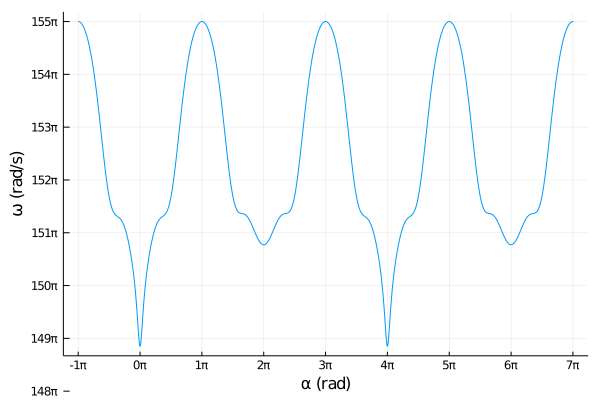

In [121]:
xRNG = collect(-1:1:19)
yRNG = collect(60:1:200)

plot(α_i[1:2*i_π], ω_i[1:2*i_π], leg=false, xlabel = "α (rad)", ylabel = "ω (rad/s)",
    xticks = (π .* xRNG, ["$(i)π" for i in xRNG]),
    yticks = (π .* yRNG, ["$(i)π" for i in yRNG]))

In [122]:
savefig("Energy-Conserv-Case-q-igual-zero-AllexDelgado - para dois ciclos.png")